# I. Overview of Customer Segmentation - RFM Analysis

**Customer segmentation** is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.


**RFM (Recency, Frequency and Monetary) Analysis** is a way to use data based on existing customer behavior to predict how a new customer is likely to act in the future. RFM Segment based on three customer attributes:
* Recency (R): How long since customer's the last purchase?
* Frequency (F): How many purchases customer have made over the period?
* Monetary (M): How much each customer spend on the business's services?

# II. Data Set Overview

In [31]:
pip install squarify 

Note: you may need to restart the kernel to use updated packages.


In [32]:
#First of all, let's import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime
import json
from urllib.request import urlopen
import squarify    # pip install squarify (algorithm for treemap)


In [33]:
# Import data set
data = pd.read_excel('/Users/huuthinle/Desktop/customer segments.xlsx')
data = pd.DataFrame(data)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [34]:
# Checking for missing values
missing_data = data.isnull().sum()
missing_percentage = (missing_data/ len(data)) * 100
missing_info = pd.DataFrame({'Count': missing_data, 'Percentage': missing_percentage})
print("Missing Data Information:")
print(missing_info)

# Checking for unique values in each column to understand the data better
print("\nUnique Values Information:")
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")

Missing Data Information:
              Count  Percentage
InvoiceNo         0    0.000000
StockCode         0    0.000000
Description    1454    0.268311
Quantity          0    0.000000
InvoiceDate       0    0.000000
UnitPrice         0    0.000000
CustomerID   135080   24.926694
Country           0    0.000000

Unique Values Information:
InvoiceNo: 25900 unique values
StockCode: 4070 unique values
Description: 4223 unique values
Quantity: 722 unique values
InvoiceDate: 23260 unique values
UnitPrice: 1630 unique values
CustomerID: 4372 unique values
Country: 38 unique values


In [35]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [36]:
## Remove null values
data = data.dropna()

In [37]:
#CustomerID: float64 -> int64
data['CustomerID'] = data['CustomerID'].astype(int)
data

<ipython-input-37-4bcbbcc6f5a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustomerID'] = data['CustomerID'].astype(int)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [38]:
# Descriptive Statistics about the Data
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [39]:
## Remove canceled transactions, (quantity >0 & unit price >0):
data = data[(data['Quantity'] >0) & (data ['UnitPrice'] > 0)]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


# III. Distribution of Recency, Frequency, and Monetary


How to calculate R-F-M score: 
* Recency: Calculate the number of days between the ending date and last date of purchase each customer.
* Frequency: Calculate the number of orders for each customer over the specific period.
* Monetary: Calculate sum of purchase price multipled quantity purchased by each customer.

In [40]:
# Calculate Monetary:
data['Monetary'] = data['Quantity']*data['UnitPrice']
Rfm =data.groupby('CustomerID')['Monetary'].sum()
rfm = pd.DataFrame(Rfm)

last_day = "2011,12,31"

# Convert last_day to a datetime object
last_day = datetime.strptime(last_day, "%Y,%m,%d")

# Calculate recency (Recency) for each customer
rfm['Recency'] = (last_day - data.groupby('CustomerID')['InvoiceDate'].max()).dt.days

#Calculate Frequency:
rfm['Frequency'] = data.groupby('CustomerID')['InvoiceNo'].nunique()
rfm

<ipython-input-40-22ad2001bbda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Monetary'] = data['Quantity']*data['UnitPrice']


,Monetary,Recency,Frequency
CustomerID,,,
12346,77183.60,346,1
12347,4310.00,23,7
12348,1797.24,96,4
12349,1757.55,39,1
12350,334.40,331,1
...,...,...,...
18280,180.60,298,1
18281,80.82,201,1
18282,178.05,28,2


In [41]:
last_day = "2011,12,31"

# Convert last_day to a datetime object
last_day = datetime.strptime(last_day, "%Y,%m,%d")

# Calculate recency (Recency) for each customer
rfm['Recency'] = (last_day - data.groupby('CustomerID')['InvoiceDate'].max()).dt.days

#Calculate Frequency:
rfm['Frequency'] = data.groupby('CustomerID')['InvoiceNo'].nunique()
rfm

,Monetary,Recency,Frequency
CustomerID,,,
12346,77183.60,346,1
12347,4310.00,23,7
12348,1797.24,96,4
12349,1757.55,39,1
12350,334.40,331,1
...,...,...,...
18280,180.60,298,1
18281,80.82,201,1
18282,178.05,28,2


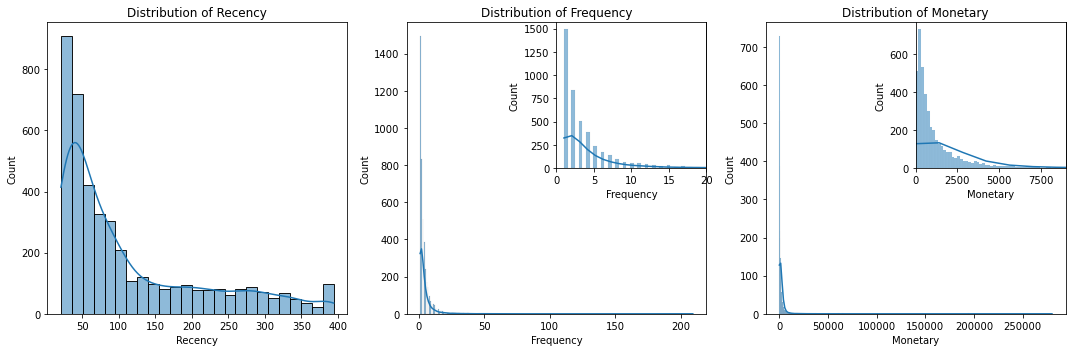

In [42]:
colnames = ['Recency', 'Frequency', 'Monetary']
# Create a single figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15,5))  # Adjust figsize as needed

for i, col in enumerate(colnames):
    sns.histplot(rfm[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()


ax_zoom = axes[1].inset_axes([0.5, 0.5, 0.5,0.5])  # Adjust the position and size as needed

# Plot the zoomed-in version on the secondary axis
sns.histplot(rfm[colnames[1]], kde=True, ax=ax_zoom)
ax_zoom.set_xlim(0, 20)  # Adjust the x-axis limits as needed

ax_zoom = axes[2].inset_axes([0.5, 0.5, 0.5,0.5])  # Adjust the position and size as needed
sns.histplot(rfm[colnames[2]], kde=True, ax=ax_zoom)
ax_zoom.set_xlim(0, 9000)  # Adjust the x-axis limits as needed


# Show the plot
filepath = ('/Users/huuthinle/Desktop/Ecommerce Retail/Distributi.png')
plt.savefig(filepath)

we can note that the histogram of all three distributions are right-skewed:
* Distribution of Recency: the rug plot is crowed betwwen 0 and 100, means that there is a high concentration of customers purchasing in the last 100 days, i.e the last 3 months. 
* Distribution of Frequency: almost customers make under 15 transactions over the year.
* Distribution of Monetary: there is not many customers spend more than $7,500. 

# IV. RFM Scores & Segments


## 1. RFM Scores
Based on the RFM model, each customer will be assigned between 1 to 5 for each RFM value. Range from 1 to 5 is equivalent to the worst score to the best score. The RFM score (RFM_score) will be counted by concating values of the three scores (R_score, F_score, M_score). 

For example, the customer with customerID - 12345 has scores of 1,2,4 in Recency, Frequency, Monetary respectively, so his RFM score is 124.

In [43]:
#Calculate R_score, F_score, M_score and RFM_score:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels = [5,4,3,2,1])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels = [1,2,3,4,5])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method = 'first'), 5, labels = [1,2,3,4,5], duplicates= 'drop')
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm = rfm.reset_index()
rfm

,CustomerID,Monetary,Recency,Frequency,R_score,M_score,F_score,RFM_score
0,12346,77183.60,346,1,1,5,1,115
1,12347,4310.00,23,7,5,5,5,555
2,12348,1797.24,96,4,2,4,4,244
3,12349,1757.55,39,1,4,4,1,414
4,12350,334.40,331,1,1,2,1,112
...,...,...,...,...,...,...,...,...
4333,18280,180.60,298,1,1,1,2,121
4334,18281,80.82,201,1,1,1,2,121
4335,18282,178.05,28,2,5,1,3,531
4336,18283,2094.88,24,16,5,5,5,555


## 2. RFM Customer Segments
The customer classification based on RFM scores will be following the 'ecommerce retail.xlsx' file (sheet_name: Segmentation). 

Based on the RFM score, we will devide all customers into several groups:

* **Champions** - bought recently, buy often and spend the most
* **Loyal Customers** - spend good money and often, responsive to promotions
* **Potential Loyalist** - recent customers, but spent a good amount and bought more than once
* **New Customers** - bought most recently, but not often
* **Promising** - recent shoppers, but haven’t spent much
* **Needing Attention** - above average recency, frequency and monetary values; may not have bought very recently though
* **About To Sleep** - below average recency, frequency and monetary values; will lose them if not reactivated
* **At Risk** - spent big money and purchased often but long time ago; need to bring them back
* **Can't Loose Them** - made biggest purchases, and often but haven’t returned for a long time
* **Hibernating** - last purchase was long back, low spenders and low number of orders
* **Lost Customers** - very small spender, last transaction was long time ago, very low number of transactions.


In [44]:
#What RFM score means?
segment = pd.read_excel('/Users/huuthinle/Desktop/customer segments.xlsx', sheet_name = 'Segmentation')
seg = pd.DataFrame(segment)
seg

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425, 4..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214, 215, 115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [45]:
# Merge result with seg based on RFM_score, allowing many-to-many merge
seg['RFM_score'] = seg['RFM Score'].str.split(', ')
seg = seg.explode('RFM_score').reset_index(drop=True)
seg = seg[['Segment','RFM_score']]
rfm_score =pd.merge(rfm, seg, on = 'RFM_score')
rfm_score

,CustomerID,Monetary,Recency,Frequency,R_score,M_score,F_score,RFM_score,Segment
0,12346,77183.60,346,1,1,5,1,115,Cannot Lose Them
1,12501,2169.39,357,1,1,5,1,115,Cannot Lose Them
2,13135,3096.00,217,1,1,5,1,115,Cannot Lose Them
3,14439,2661.24,340,1,1,5,1,115,Cannot Lose Them
4,12347,4310.00,23,7,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
4333,17580,215.72,273,3,1,1,4,141,Lost customers
4334,16500,400.86,25,6,5,2,5,552,Potential Loyalist
4335,16668,306.72,36,6,4,2,5,452,Potential Loyalist
4336,17988,201.12,32,7,5,1,5,551,Potential Loyalist


# V. Analysis of RFM Segments

Based on the RFM segment analysis, it's encouraging to see that the "Champions" group, which makes up 20% of the customer base, contributes over 60% of the business revenue. Surprisingly, loyal customers represent just 10% of all customers, generating a comparable amount of revenue. 
Looking at non-proactive customer groups such as 'At Risk,' 'About to Sleep,' 'Cannot Lose Them,' and 'Hibernating' who comprise 35% of all customers but contribute only 15% of total sales. It's essential to initiate a reach-out campaign for these groups before they turn into 'Lost Customers,' which have increased to over 11% over the past year, generating just 1.09% of revenues.

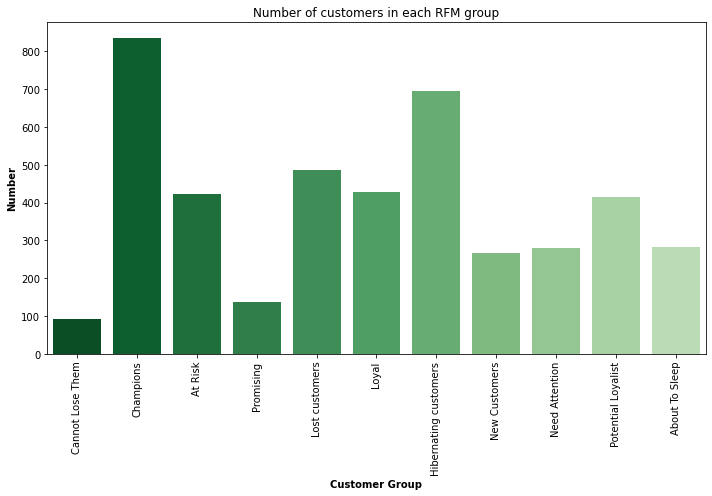

In [46]:
# Take a quick comparison of No.Customers in each group
palette = sns.color_palette("Greens_r", n_colors=15)
plt.figure (figsize = (10,7))
sns.countplot( x = 'Segment', data = rfm_score, palette = palette)
plt.title ('Number of customers in each RFM group')
plt.xticks (rotation = 90)
plt.xlabel("Customer Group", weight = 'bold', fontsize = 10)
plt.ylabel('Number', weight = 'bold', fontsize = 10)
plt.tight_layout()
# Show the plot
filepath = ('/Users/huuthinle/Desktop/Ecommerce Retail/heyyy.png')
plt.savefig(filepath)

In [47]:
# Let's see how much each group generates values for the business?
agg_fun= {'CustomerID':'count',
          'Recency':'mean',
          'Frequency': 'mean',
          'Monetary':'sum'}
cus_gr = rfm_score.groupby('Segment').agg(agg_fun).sort_values ('Recency').reset_index()
cus_gr.rename(columns = {'CustomerID' : "count"}, inplace = True)
cus_gr['count_share'] = cus_gr['count']/cus_gr['count'].sum()
cus_gr['monetary_share'] = cus_gr['Monetary']/cus_gr['Monetary'].sum()
cus_gr

,Segment,count,Recency,Frequency,Monetary,count_share,monetary_share
0,Champions,835,31.816766,12.113772,5604376.680,0.192485,0.628899
1,Promising,136,45.904412,1.323529,121031.350,0.031351,0.013582
2,Potential Loyalist,414,47.053140,2.526570,225740.110,0.095436,0.025332
3,New Customers,267,48.891386,1.071161,59755.620,0.061549,0.006706
4,Need Attention,280,54.350000,3.103571,462835.741,0.064546,0.051937
5,Loyal,428,57.070093,5.320093,1021224.390,0.098663,0.114597
6,About To Sleep,283,107.325088,1.282686,77885.540,0.065237,0.008740
7,At Risk,422,164.419431,3.763033,751808.221,0.097280,0.084365
8,Hibernating customers,696,169.916667,1.554598,285673.342,0.160443,0.032057
9,Cannot Lose Them,91,256.230769,2.285714,203671.300,0.020977,0.022855


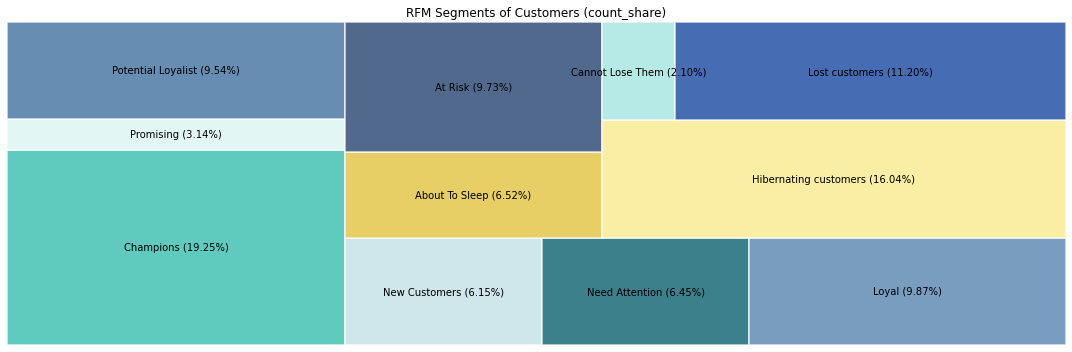

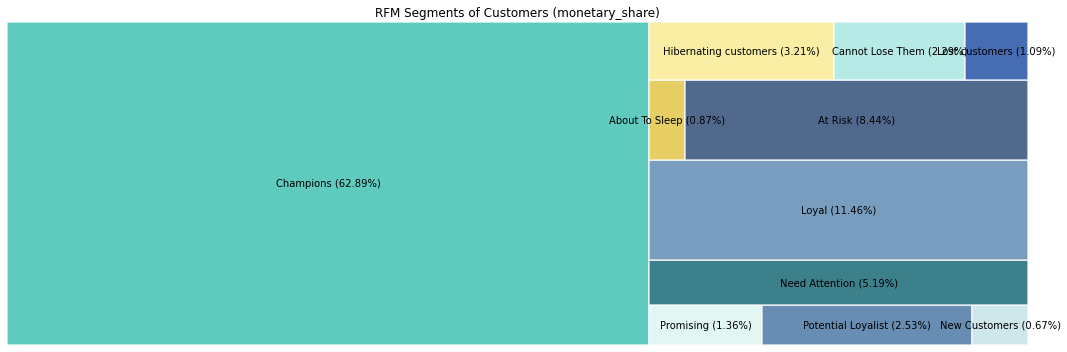

In [48]:
colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']
for col in ['count_share', 'monetary_share']:
    labels = cus_gr['Segment'] + cus_gr[col].apply(lambda x: ' ({0:.2f}%)'.format(x*100))
     
    fig, ax = plt.subplots( figsize=(15,5))
    squarify.plot(sizes=cus_gr[col], label=labels, alpha=.8, color=colors,
                  bar_kwargs = dict(linewidth = 1.5, edgecolor = 'white'))
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.tight_layout()

fig.savefig('/Users/huuthinle/Desktop/Ecommerce Retail/RFM Segments')

# VI. Demographic Analysis of RFM segments

The dataset contains information about orders placed by customers from all over the world. Analysis of customer's country of origing combained with RFM score gives an interesting overview of the most profitable locations.

In the global market, key foreign markets - Europe such as German and France, Australia, and Japan- stands out as the most significant in terms of sales and customer base. These regions present future growth opportunities, so our immediate 
focus remains on strengthening our presence and maximizing our potential in the USA, Canada, Australia, and Japan. The success we achieve in these regions will not only bolster our global revenue but also provide valuable insights and experience as we consider future expansions into new territories such as Asia (excluding Japnan & Singapore) and Africa - with no recored customer.

In [49]:
country_dict = {
    "USA": "United States of America",
    "Singapore": "Malaysia",
    "Tanzania": "United Republic of Tanzania",
    "Myanmar (Burma)": "Myanmar",
    "RSA": "Russia",
    "Channel Islands": "United Kingdom",
    #"Barbados": ,
    "Martinique": "France",
    "Guadeloupe": "France",
    "Hong Kong": "China",
    #"Bahrain": ,
    "Swaziland": "eSwatini",
}

In [50]:
agg_dict = {'CustomerID':'nunique', 'Monetary': 'sum'}
data['Country'] = data['Country'].apply(lambda x: country_dict[x] if x in country_dict.keys() else x)
address = data.groupby('Country').agg(agg_dict).reset_index()
address= address.rename (columns= {'CustomerID': "No.Customers"})
address['Monetary'] = address['Monetary'].round(2)
address

<ipython-input-50-6c323d55aefd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country'] = data['Country'].apply(lambda x: country_dict[x] if x in country_dict.keys() else x)


,Country,No.Customers,Monetary
0,Australia,9,138521.31
1,Austria,11,10198.68
2,Bahrain,2,548.40
3,Belgium,25,41196.34
4,Brazil,1,1143.60
5,Canada,4,3666.38
6,Cyprus,8,13590.38
7,Czech Republic,1,826.74
8,Denmark,9,18955.34
9,EIRE,3,265545.90


In [57]:
# from urllib.request import urlopen
with urlopen('https://raw.githubusercontent.com/thinlh07/Customer-Segments/main/customer.geo.json') as response:
    countries = json.load(response)  

# Create the choropleth map
fig = px.choropleth_mapbox(
    address,
    width=1000,
    height=500,
    geojson=countries,
    locations='Country',
    featureidkey="properties.sovereignt",
    color='No.Customers',
    color_continuous_scale="Viridis",
    range_color = (0,20),
    mapbox_style="open-street-map",
    zoom=0.5,
    center={"lat": 40, "lon": -10},
    opacity=0.5,
    labels={'No.Customers': 'Number of Customers', 'Monetary': 'Monetary'},
    hover_data={'Monetary': True, 'No.Customers': True, 'Country': True})

fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0))



AttributeError: 'Figure' object has no attribute 'savefig'